## Import some libraries

In [15]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline


## Utility function to read images

In [16]:
def read_image(image_path):
    image = cv2.imread(image_path)
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

## See original frame

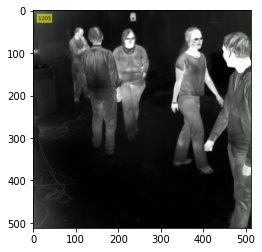

In [17]:
image = read_image(os.path.join("data", "original.png"))
plt.imshow(image)

## See the original image in HOT colormap

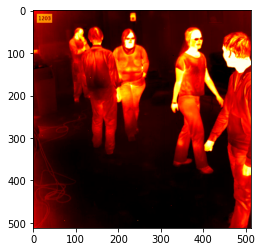

In [18]:
heatmap_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
heatmap = cv2.applyColorMap(heatmap_gray, cv2.COLORMAP_HOT)
heatmap = cv2.cvtColor(heatmap, cv2.COLOR_BGR2RGB)
plt.imshow(heatmap)

## Do binary threshold

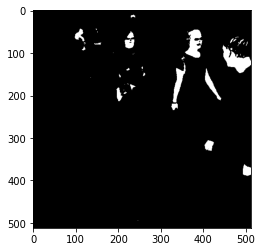

In [19]:
heatmap_gray = cv2.cvtColor(heatmap, cv2.COLOR_RGB2GRAY)
ret, binary_thresh = cv2.threshold(heatmap_gray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(binary_thresh, cmap='gray')

## Opening operation. i.e. Erosion followed by Dilation to enhance images for thermal detection

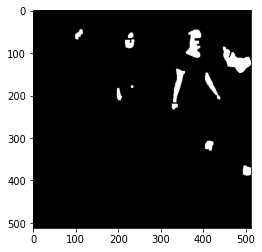

In [20]:
kernel = np.ones((5, 5), np.uint8)
image_erosion = cv2.erode(binary_thresh, kernel, iterations=1)
image_opening = cv2.dilate(image_erosion, kernel, iterations=1)
plt.imshow(image_opening, cmap='gray')

## Combining original gray image and heatmap image to compare images

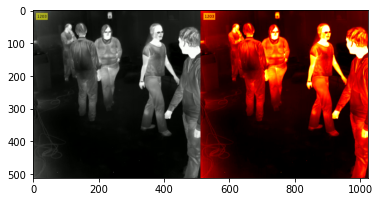

In [24]:
stacked = np.hstack((image, heatmap))
plt.imshow(stacked)

##Finding Contour Points

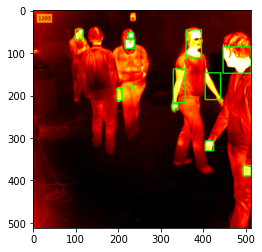

In [26]:
contours, _ = cv2.findContours(image_opening, 1, 2)

rectangles = np.copy(heatmap)

for i in contours:
    # Rectangles over contours
    x, y, a, b = cv2.boundingRect(i)

    # For visualisation
    rectangles = cv2.rectangle(rectangles, (x, y), (x+a, y+b), (0, 255, 0), 2)

plt.imshow(rectangles)

In [23]:
def convert_to_temperature(pixel_avg):
    return pixel_avg/2.25

##Detecting Temperature

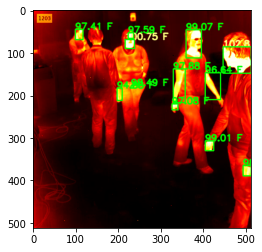

In [27]:
contours, _ = cv2.findContours(image_opening, 1, 2)

rectangles = np.copy(heatmap)

for i in contours:
    # creating rectangles over each contours
    x, y, a, b = cv2.boundingRect(i)
    
    # Creating Boolean Matrix.
    mask = np.zeros_like(heatmap_gray)
    cv2.drawContours(mask, i, -1, 255, -1)

    # Mean of only those pixels which are in blocks and not the whole rectangle selected
    mean = convert_to_temperature(cv2.mean(heatmap_gray, mask=mask)[0])

    # Colors for rectangles
    temperature = round(mean, 2)
    color = (0, 255, 0) if temperature < 100.5 else (255, 255, 127)

    cv2.putText(rectangles, "{} F".format(temperature), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, color, 2, cv2.LINE_AA)
    # For Visualisation
    rectangles = cv2.rectangle(rectangles, (x, y), (x+a, y+b), (0, 255, 0), 2)

plt.imshow(rectangles)

In [28]:
# End